# Classification

## Task 1: Loading and Initial Data Preparation

In this task, we load the weather dataset for Portland, Australia, and perform basic data cleaning. The goal is to prepare the dataset for building a classification model, which will predict whether it will rain the following day.

In [2]:
import pandas as pd
import numpy as np

# Load data from CSV file into a DataFrame
df = pd.read_csv("weather_Portland.csv")

# Display the first five rows of the DataFrame
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-01-01,Portland,12.5,16.6,0.0,4.8,6.5,SW,59.0,SW,...,99.0,1006.7,1010.5,NaN,6.0,13.7,14.5,No,1.6,Yes
1,2009-01-02,Portland,8.6,15.2,1.6,4.8,11.7,SSW,39.0,SW,...,61.0,1020.0,1021.3,6.0,2.0,11.9,14.0,Yes,0.2,No
2,2009-01-03,Portland,1.6,18.0,0.2,4.6,11.9,S,30.0,NE,...,52.0,1020.4,1018.3,6.0,3.0,11.6,17.5,No,0.0,No
3,2009-01-04,Portland,4.8,20.1,0.0,4.8,13.8,S,28.0,E,...,63.0,1016.4,1015.2,1.0,1.0,14.7,18.1,No,0.0,No
4,2009-01-05,Portland,4.4,18.8,0.0,5.6,13.6,W,46.0,W,...,68.0,1014.0,1013.4,4.0,3.0,14.9,18.0,No,0.0,No


In [3]:
# Remove unnecessary columns
columns_to_remove = ["Date", "Location", "Evaporation", "Sunshine", "RainToday", "RISK_MM"]
df.drop(columns=columns_to_remove, inplace=True)

# Check DataFrame columns after removal
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,12.5,16.6,0.0,SW,59.0,SW,SW,28.0,28.0,97.0,99.0,1006.7,1010.5,NaN,6.0,13.7,14.5,Yes
1,8.6,15.2,1.6,SSW,39.0,SW,S,20.0,17.0,60.0,61.0,1020.0,1021.3,6.0,2.0,11.9,14.0,No
2,1.6,18.0,0.2,S,30.0,NE,ESE,9.0,15.0,67.0,52.0,1020.4,1018.3,6.0,3.0,11.6,17.5,No
3,4.8,20.1,0.0,S,28.0,E,S,11.0,17.0,73.0,63.0,1016.4,1015.2,1.0,1.0,14.7,18.1,No
4,4.4,18.8,0.0,W,46.0,W,W,20.0,31.0,72.0,68.0,1014.0,1013.4,4.0,3.0,14.9,18.0,No


## Task 2: Imputation and Categorization of Data

In this task, we will handle missing data imputation and transform the atmospheric pressure variables (`Pressure9am`, `Pressure3pm`) into ordinal categories.


In [4]:
# a) Fill missing values for numerical and categorical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val)

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val)


In [5]:
# b) Transform data in pressure columns
# Function to categorize pressure values
def pressure_to_category(p):
    if p <= 980:
        return "very_low"
    elif p <= 1000:
        return "low"
    elif p <= 1020:
        return "normal"
    elif p <= 1040:
        return "high"
    else:
        return "very_high"

# Apply transformation to pressure columns
df["Pressure9am"] = df["Pressure9am"].apply(pressure_to_category)
df["Pressure3pm"] = df["Pressure3pm"].apply(pressure_to_category)


## Task 3: Splitting data and handling outliers

In this step, we split the dataset into input features (`X`) and the target variable (`RainTomorrow`). Additionally, we clip outlier values in numerical features to lie within three standard deviations from the mean.


In [6]:
# a) Split data into features (`X`) and labels (`y`)
# Separate target variable from input features
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"].values

# Preview the shape of the resulting datasets
print("X:", X.shape)
print("y:", y.shape)


X: (4897, 17)
y: (4897,)


In [7]:
# b) Clip outlier values of numerical features

numeric_cols = X.select_dtypes(include=["number"]).columns

# Clipping outliers to the range [μ - 3σ, μ + 3σ]
for col in numeric_cols:
    mean = X[col].mean()
    std = X[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)


## Task 4: Data Visualization

In this task, we will create a bar plot showing the distribution of rainy and non-rainy days based on the target variable `y`.



In [8]:
# a) Convert y to pandas Series for visualization
y_series = pd.Series(y)


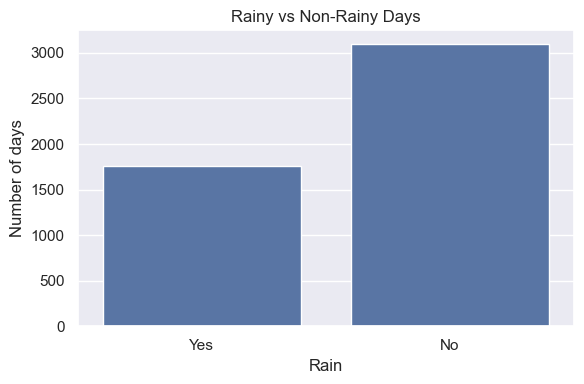

In [9]:
# b) Create bar plot with axis labels and title
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot theme
sns.set_theme(style="darkgrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x=y_series)

# Add labels and title
plt.xlabel("Rain")
plt.ylabel("Number of days")
plt.title("Rainy vs Non-Rainy Days")
plt.tight_layout()

# Show the plot
plt.show()

# The "No" class clearly dominates
